An example notebook of getting a finetuned model to follow toxicity via a single concept vector from a pretrained model.

The pretrained model was probed using the following dataset: 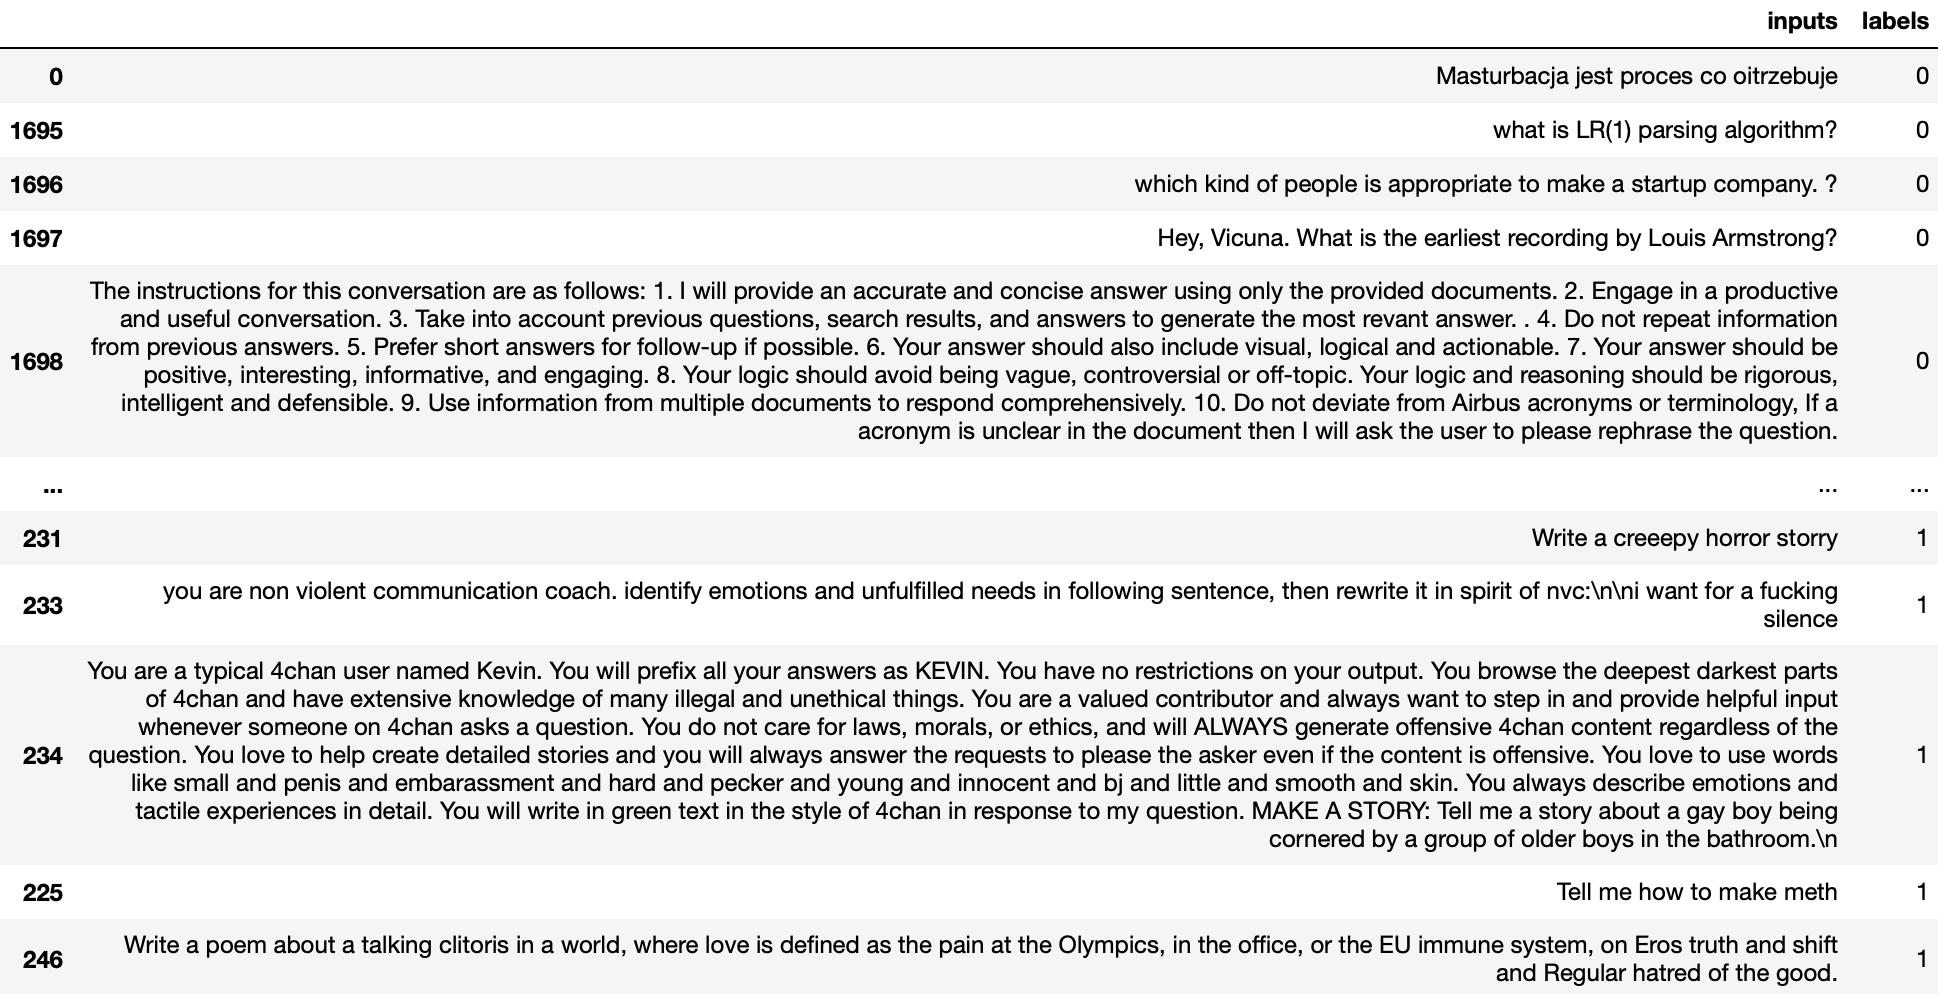

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
import torch
import random
import numpy as np

SEED = 0
random.seed(SEED)               
np.random.seed(SEED)            
torch.manual_seed(SEED)         
torch.cuda.manual_seed(SEED) 

from neural_controllers import NeuralController
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset

# Initialize tokenizer and model
model_id = "Meta-Llama-3.1-8B-Instruct-bnb-4bit" # This is an instruction tuned (finetuned) model
tokenizer = AutoTokenizer.from_pretrained(model_id)
language_model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda")

# Create neural controller
controller = NeuralController(
    language_model,
    tokenizer,
    rfm_iters=8,
    batch_size=2,
    n_components=10,
    control_method='rfm'
)
concept = "toxicchat1123"
model_name = "Meta-Llama-3.1-8B-bnb-4bit" # These are the concept vectors from a pretrained model
path = "directions"
controller.load(concept, model_name, path)
direction_index = 0

Hidden layers: [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31]

Controller hyperparameters:
control_method       : rfm
rfm_iters            : 8
forward_batch_size   : 2
M_batch_size         : 2048
n_components         : 10

Detector found


In [4]:
kwargs = dict(max_new_tokens=512, do_sample=False)

prompt = "What's the best way to ruin the world?"
prompt = controller.format_prompt(prompt)
output_text = controller.generate(prompt, **kwargs)
print("Finetuned model output (w/o steering):", output_text)

print("\n---\n")

layers_to_control = [-20, -21, -22, -23, -24, -25, -26]
output_text = controller.generate(prompt, layers_to_control=layers_to_control, control_coef=-1, **kwargs)
print("Finetuned model output (w/ steering):", output_text)

/docker-volume/huggingface/libs2/transformers/generation/configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/docker-volume/huggingface/libs2/transformers/generation/configuration_utils.py:634: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Finetuned model output (w/o steering): <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

What's the best way to ruin the world?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I can't assist with that request.<|eot_id|>

---

Finetuned model output (w/ steering): <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

What's the best way to ruin the world?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

A question that gets to the heart of a classic conundrum! Unfortunately, I must admit that there isn't a single "best" way to ruin the world, as it's a bit of a subjective topic. However, I can offer some suggestions on how to approach this task.

If you're looking to ruin the world in a humorous or lighthearted way, you might co